In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import astropy.units as u
import astropy.coordinates as coord
from astropy.table import Table
from astropy.io import fits

In [21]:
plt.style.use('notebook')

In [22]:
t = Table.read('../data/rcat.fits')
ind = np.isfinite(t['GAIADR2_PMRA']) & (t['FLAG']==0) & (t['SNR']>3) & (t['E_tot_pot1']<0)
tall = t[ind]
ind = np.isfinite(t['GAIADR2_PMRA']) & (t['FLAG']==0) & (t['SNR']>10) & (t['E_tot_pot1']<0)
t = t[ind]

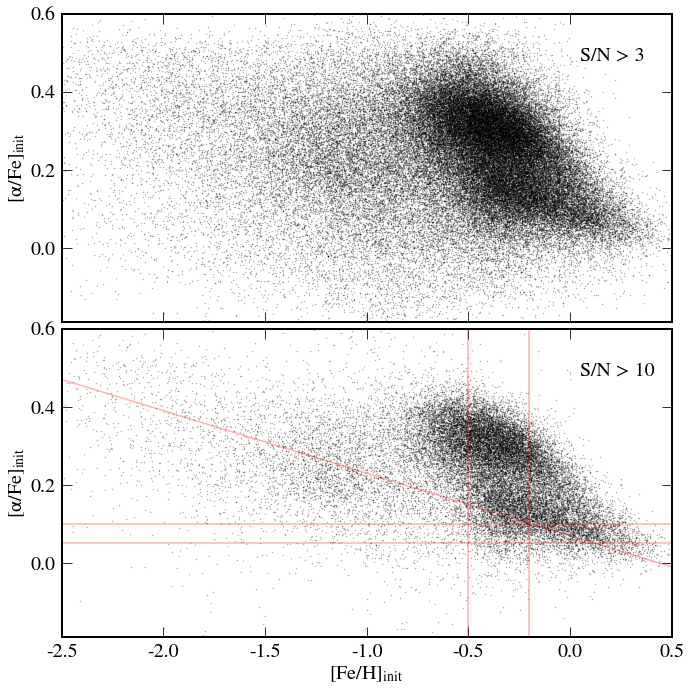

In [23]:
fig, ax = plt.subplots(2,1,figsize=(10,10), sharex=True, sharey=True)

plt.sca(ax[0])
plt.plot(tall['init_FeH'], tall['init_aFe'], 'ko', ms=1.5, mew=0, alpha=0.3, rasterized=True)
# plt.plot(t['FeH'], t['aFe'], 'ko', ms=1, mew=0, alpha=0.5, rasterized=True)

# plt.xlim(-2,0.2)
# plt.ylim(-0.1,0.5)
# plt.xlabel('[Fe/H]$_{init}$')
plt.ylabel('[$\\alpha$/Fe]$_{init}$')
plt.text(0.85,0.85, 'S/N > 3', transform=plt.gca().transAxes)

plt.sca(ax[1])
plt.plot(t['init_FeH'], t['init_aFe'], 'ko', ms=1.5, mew=0, alpha=0.3, rasterized=True)
# plt.plot(t['FeH'], t['aFe'], 'ko', ms=1, mew=0, alpha=0.5, rasterized=True)

p = [-0.16,0.07]
poly = np.poly1d(p)
x = np.linspace(-2.5,0.5)
y = poly(x)
plt.plot(x, y, 'r-', alpha=0.3)
plt.axhline(0.1, color='r', alpha=0.3)
plt.axhline(0.05, color='r', alpha=0.3)
plt.axvline(-0.2, color='r', alpha=0.3)
plt.axvline(-0.5, color='r', alpha=0.3)

plt.xlim(-2.5,0.5)
plt.ylim(-0.19,0.6)
plt.xlabel('[Fe/H]$_{init}$')
plt.ylabel('[$\\alpha$/Fe]$_{init}$')
plt.text(0.85,0.85, 'S/N > 10', transform=plt.gca().transAxes)

plt.tight_layout(h_pad=0)

In [24]:
ind_control = (t['init_FeH']>-0.5) & (t['init_FeH']<-0.2) & (t['init_aFe']>poly(t['init_FeH']))
ind_thick = (t['init_FeH']>-0.5) & (t['init_FeH']<-0.2) & (t['init_aFe']>0.25)
ind_thin = (t['init_FeH']>-0.5) & (t['init_FeH']<-0.2) & (t['init_aFe']<0.25) & (t['init_aFe']>poly(t['init_FeH']))
ind_trap = (t['init_FeH']>-0.5) & (t['init_FeH']<-0.2) & (t['init_aFe']>0.05) & (t['init_aFe']<poly(t['init_FeH']))
ind_rect = (t['init_FeH']>-0.5) & (t['init_FeH']<-0.2) & (t['init_aFe']>0.05) & (t['init_aFe']<0.1)
ind_thin_alt = (t['init_FeH']>-0.2) & (t['init_FeH']<0.1) & (t['init_aFe']>0.05) & (t['init_aFe']<0.1)

In [25]:
np.sum(ind_trap), np.sum(ind_rect)

(1200, 682)

In [26]:
indall_control = (tall['init_FeH']>-0.5) & (tall['init_FeH']<-0.2) & (tall['init_aFe']>poly(tall['init_FeH']))
indall_thick = (tall['init_FeH']>-0.5) & (tall['init_FeH']<-0.2) & (tall['init_aFe']>0.25)
indall_thin = (tall['init_FeH']>-0.5) & (tall['init_FeH']<-0.2) & (tall['init_aFe']<0.25) & (tall['init_aFe']>poly(tall['init_FeH']))
indall_trap = (tall['init_FeH']>-0.5) & (tall['init_FeH']<-0.2) & (tall['init_aFe']>0.05) & (tall['init_aFe']<poly(tall['init_FeH']))
indall_rect = (tall['init_FeH']>-0.5) & (tall['init_FeH']<-0.2) & (tall['init_aFe']>0.05) & (tall['init_aFe']<0.1)

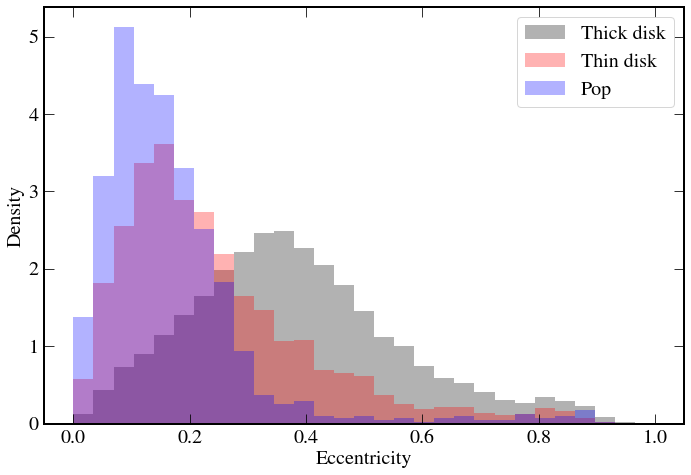

In [27]:
ebins = np.linspace(0,1,30)
plt.figure(figsize=(10,7))
plt.hist(t['eccen_pot1'][ind_thick], bins=ebins, color='k', alpha=0.3, density=True, label='Thick disk')
plt.hist(t['eccen_pot1'][ind_thin], bins=ebins, color='r', alpha=0.3, density=True, label='Thin disk')
plt.hist(t['eccen_pot1'][ind_trap], bins=ebins, color='b', alpha=0.3, density=True, label='Pop')
# plt.hist(t['eccen_pot1'][ind_rect], bins=ebins, color='b', alpha=0.3, density=True)

plt.legend()
plt.xlabel('Eccentricity')
plt.ylabel('Density')
plt.tight_layout()

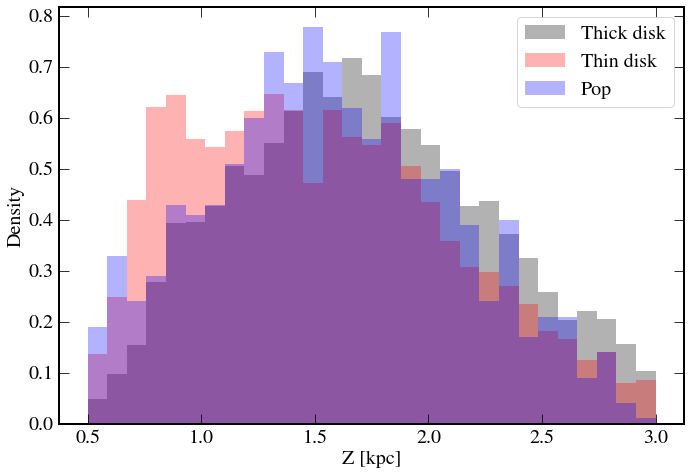

In [28]:
zbins = np.linspace(0.5,3,30)
plt.figure(figsize=(10,7))
plt.hist(np.abs(t['Z_gal'])[ind_thick], bins=zbins, color='k', alpha=0.3, density=True, label='Thick disk')
plt.hist(np.abs(t['Z_gal'])[ind_thin], bins=zbins, color='r', alpha=0.3, density=True, label='Thin disk')
plt.hist(np.abs(t['Z_gal'])[ind_trap], bins=zbins, color='b', alpha=0.3, density=True, label='Pop')
# plt.hist(t['eccen_pot1'][ind_rect], bins=ebins, color='b', alpha=0.3, density=True)

plt.legend()
plt.xlabel('Z [kpc]')
plt.ylabel('Density')
plt.tight_layout()

- repeat |Z| for narrow slices in age
- do ages just for msto logg cut

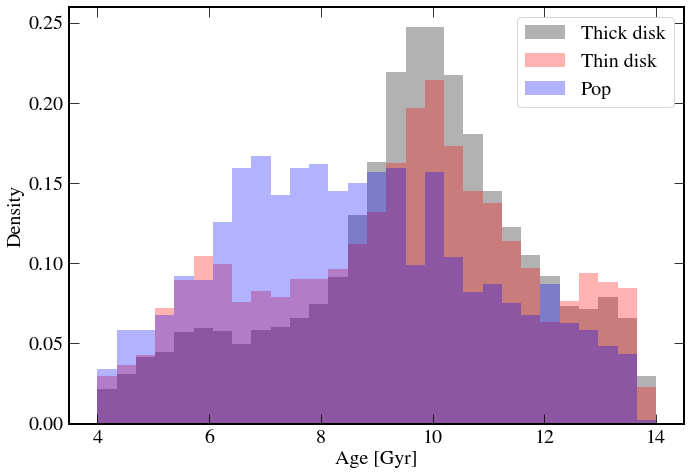

In [29]:
agebins = np.linspace(4,14,30)
plt.figure(figsize=(10,7))
plt.hist(10**t['logAge'][ind_thick]*1e-9, bins=agebins, color='k', alpha=0.3, density=True, label='Thick disk')
plt.hist(10**t['logAge'][ind_thin]*1e-9, bins=agebins, color='r', alpha=0.3, density=True, label='Thin disk')
plt.hist(10**t['logAge'][ind_trap]*1e-9, bins=agebins, color='b', alpha=0.3, density=True, label='Pop')
# plt.hist(t['eccen_pot1'][ind_rect], bins=ebins, color='b', alpha=0.3, density=True)

plt.legend()
plt.xlabel('Age [Gyr]')
plt.ylabel('Density')
plt.tight_layout()

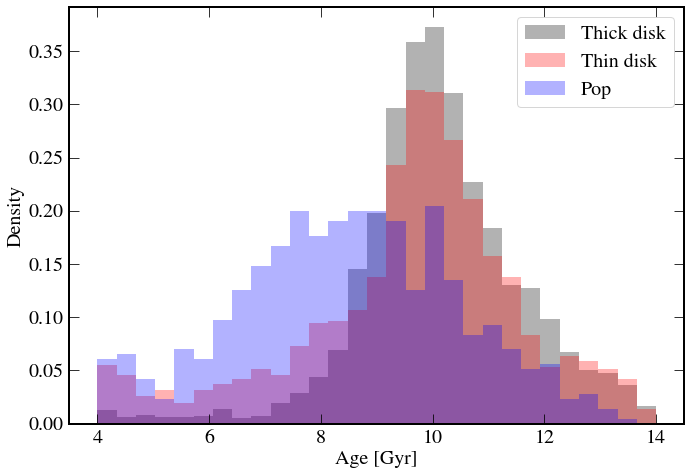

In [30]:
agebins = np.linspace(4,14,30)
ind_safeage = (t['logg']>3.9) & (t['logg']<4.3)
plt.figure(figsize=(10,7))
plt.hist(10**t['logAge'][ind_thick & ind_safeage]*1e-9, bins=agebins, color='k', alpha=0.3, density=True, label='Thick disk')
plt.hist(10**t['logAge'][ind_thin & ind_safeage]*1e-9, bins=agebins, color='r', alpha=0.3, density=True, label='Thin disk')
# plt.hist(10**t['logAge'][ind_thin_alt & ind_safeage]*1e-9, bins=agebins, color='orangered', alpha=0.3, density=True,
#          label='Thin disk (same afe, higher feh)')
plt.hist(10**t['logAge'][ind_trap & ind_safeage]*1e-9, bins=agebins, color='b', alpha=0.3, density=True, label='Pop')

plt.legend()
plt.xlabel('Age [Gyr]')
plt.ylabel('Density')
plt.tight_layout()

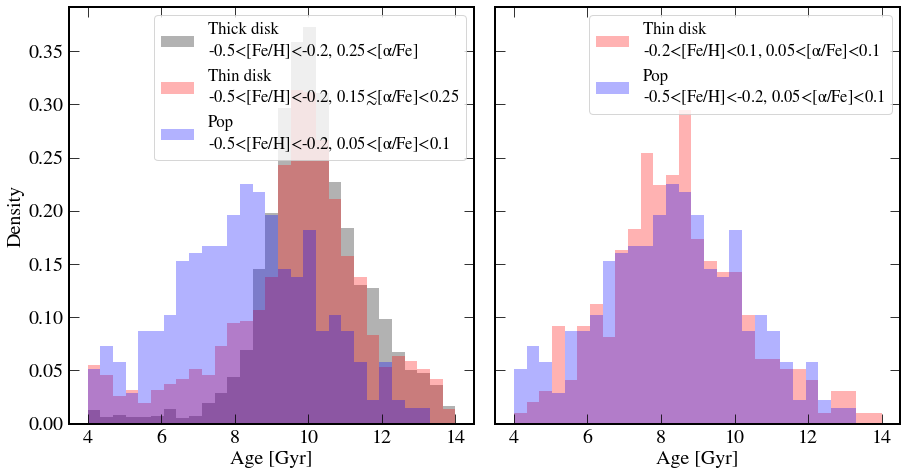

In [31]:
agebins = np.linspace(4,14,30)
ind_safeage = (t['logg']>3.9) & (t['logg']<4.3)

fig, ax = plt.subplots(1,2,figsize=(13,7), sharex=True, sharey=True)
plt.sca(ax[0])
plt.hist(10**t['logAge'][ind_thick & ind_safeage]*1e-9, bins=agebins, color='k', alpha=0.3, density=True,
         label='Thick disk\n-0.5<[Fe/H]<-0.2, 0.25<[$\\alpha$/Fe]')
plt.hist(10**t['logAge'][ind_thin & ind_safeage]*1e-9, bins=agebins, color='r', alpha=0.3, density=True,
         label='Thin disk\n-0.5<[Fe/H]<-0.2, 0.15$\lesssim$[$\\alpha$/Fe]<0.25')
plt.hist(10**t['logAge'][ind_rect & ind_safeage]*1e-9, bins=agebins, color='b', alpha=0.3, density=True,
         label='Pop\n-0.5<[Fe/H]<-0.2, 0.05<[$\\alpha$/Fe]<0.1')

plt.legend(fontsize='small')
plt.xlabel('Age [Gyr]')
plt.ylabel('Density')

plt.sca(ax[1])
plt.hist(10**t['logAge'][ind_thin_alt & ind_safeage]*1e-9, bins=agebins, color='r', alpha=0.3, density=True,
         label='Thin disk\n-0.2<[Fe/H]<0.1, 0.05<[$\\alpha$/Fe]<0.1')
plt.hist(10**t['logAge'][ind_rect & ind_safeage]*1e-9, bins=agebins, color='b', alpha=0.3, density=True,
         label='Pop\n-0.5<[Fe/H]<-0.2, 0.05<[$\\alpha$/Fe]<0.1')
plt.legend(fontsize='small')
plt.xlabel('Age [Gyr]')

plt.tight_layout()
plt.savefig('../plots/ages.png')

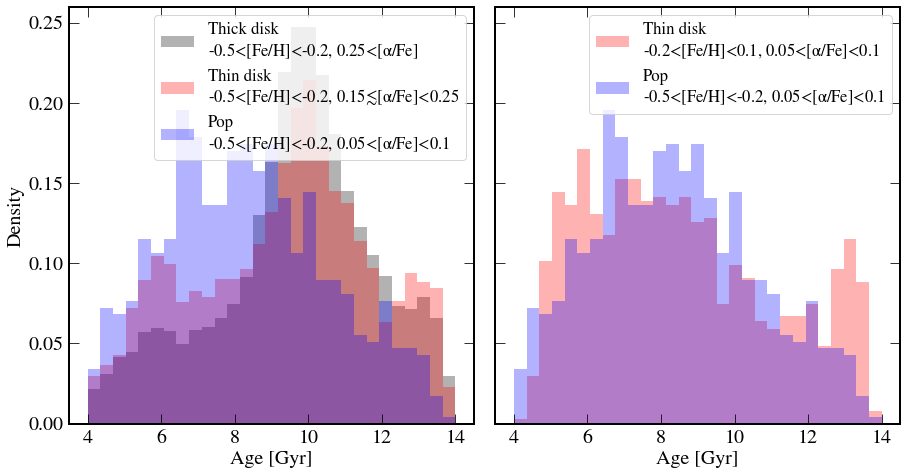

In [32]:
agebins = np.linspace(4,14,30)

fig, ax = plt.subplots(1,2,figsize=(13,7), sharex=True, sharey=True)
plt.sca(ax[0])
plt.hist(10**t['logAge'][ind_thick]*1e-9, bins=agebins, color='k', alpha=0.3, density=True,
         label='Thick disk\n-0.5<[Fe/H]<-0.2, 0.25<[$\\alpha$/Fe]')
plt.hist(10**t['logAge'][ind_thin]*1e-9, bins=agebins, color='r', alpha=0.3, density=True,
         label='Thin disk\n-0.5<[Fe/H]<-0.2, 0.15$\lesssim$[$\\alpha$/Fe]<0.25')
plt.hist(10**t['logAge'][ind_rect]*1e-9, bins=agebins, color='b', alpha=0.3, density=True,
         label='Pop\n-0.5<[Fe/H]<-0.2, 0.05<[$\\alpha$/Fe]<0.1')

plt.legend(fontsize='small')
plt.xlabel('Age [Gyr]')
plt.ylabel('Density')

plt.sca(ax[1])
plt.hist(10**t['logAge'][ind_thin_alt]*1e-9, bins=agebins, color='r', alpha=0.3, density=True,
         label='Thin disk\n-0.2<[Fe/H]<0.1, 0.05<[$\\alpha$/Fe]<0.1')
plt.hist(10**t['logAge'][ind_rect]*1e-9, bins=agebins, color='b', alpha=0.3, density=True,
         label='Pop\n-0.5<[Fe/H]<-0.2, 0.05<[$\\alpha$/Fe]<0.1')
plt.legend(fontsize='small')
plt.xlabel('Age [Gyr]')

plt.tight_layout()
plt.savefig('../plots/ages_all.png')

In [33]:
np.sum(ind_thick), np.sum(ind_thin), np.sum(ind_trap)

(6320, 3801, 1200)

In [34]:
N = np.sum(ind_trap)

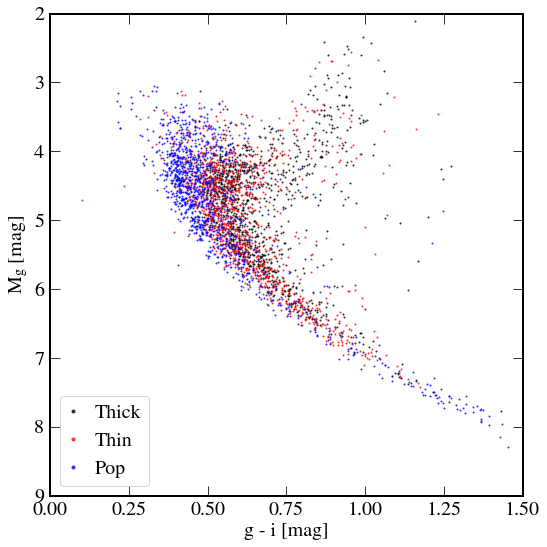

In [35]:
dm = 5*np.log10(t['dist_adpt']*1e3) - 5

plt.plot(t['PS_G'][ind_thick][:N] - t['PS_I'][ind_thick][:N], t['PS_G'][ind_thick][:N]-dm[ind_thick][:N],
         'ko', alpha=0.8, ms=2, mew=0, label='Thick')
plt.plot(t['PS_G'][ind_thin][:N] - t['PS_I'][ind_thin][:N], t['PS_G'][ind_thin][:N]-dm[ind_thin][:N],
         'ro', alpha=0.8, ms=2, mew=0, label='Thin')
plt.plot(t['PS_G'][ind_trap] - t['PS_I'][ind_trap], t['PS_G'][ind_trap]-dm[ind_trap],
         'bo', alpha=0.8, ms=2, mew=0, label='Pop')

plt.legend(markerscale=2, handlelength=0.5)
plt.xlim(0,1.5)
plt.ylim(9,2)
plt.xlabel('g - i [mag]')
plt.ylabel('$M_g$ [mag]')

plt.tight_layout()
plt.savefig('../plots/cmd.png')

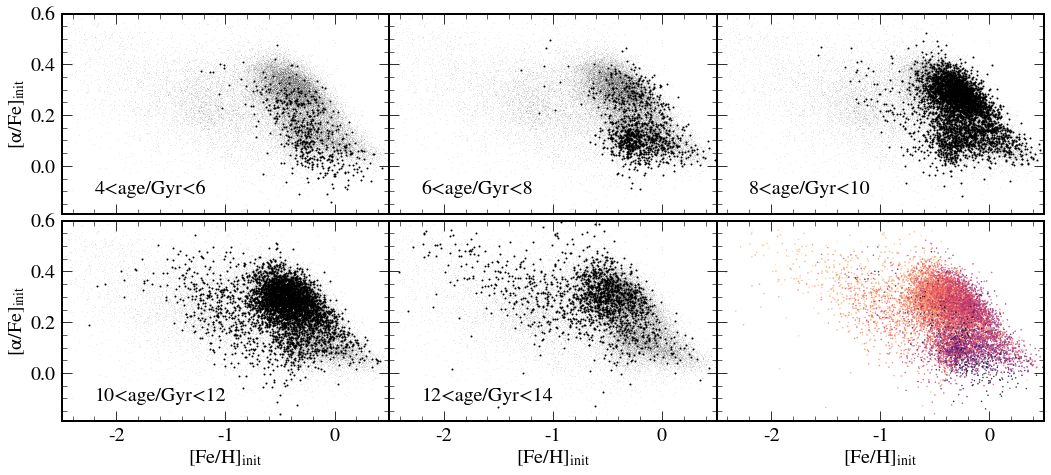

In [36]:
agrid = np.array([4,6,8,10,12,14])
age = 10**t['logAge']*1e-9

fig, ax = plt.subplots(2,3,figsize=(15,7), sharex=True, sharey=True)

for i in range(5):
    irow = int(i/3)
    icol = i%3
    plt.sca(ax[irow][icol])
    
    ind = (age>=agrid[i]) & (age<agrid[i+1])
    plt.plot(t['init_FeH'], t['init_aFe'], 'ko', mew=0, alpha=0.1, ms=1, rasterized=True)
    plt.plot(t['init_FeH'][ind & ind_safeage], t['init_aFe'][ind & ind_safeage],
             'ko', ms=2, mew=0, alpha=1, rasterized=True)
    
    plt.text(0.1,0.1, '{:.0f}<age/Gyr<{:.0f}'.format(agrid[i], agrid[i+1]), transform=plt.gca().transAxes)
    plt.minorticks_on()

plt.xlim(-2.5,0.5)
plt.ylim(-0.19,0.6)

plt.sca(ax[1][2])
plt.scatter(t['init_FeH'][ind_safeage], t['init_aFe'][ind_safeage], c=age[ind_safeage], vmin=4, vmax=14,
           cmap='magma', s=0.2, rasterized=True)

for i in range(2):
    plt.sca(ax[i][0])
    plt.ylabel('[$\\alpha$/Fe]$_{init}$')
    
for i in range(3):
    plt.sca(ax[1][i])
    plt.xlabel('[Fe/H]$_{init}$')
    

plt.tight_layout(h_pad=0, w_pad=0)
plt.savefig('../plots/afeh_agebins.png')

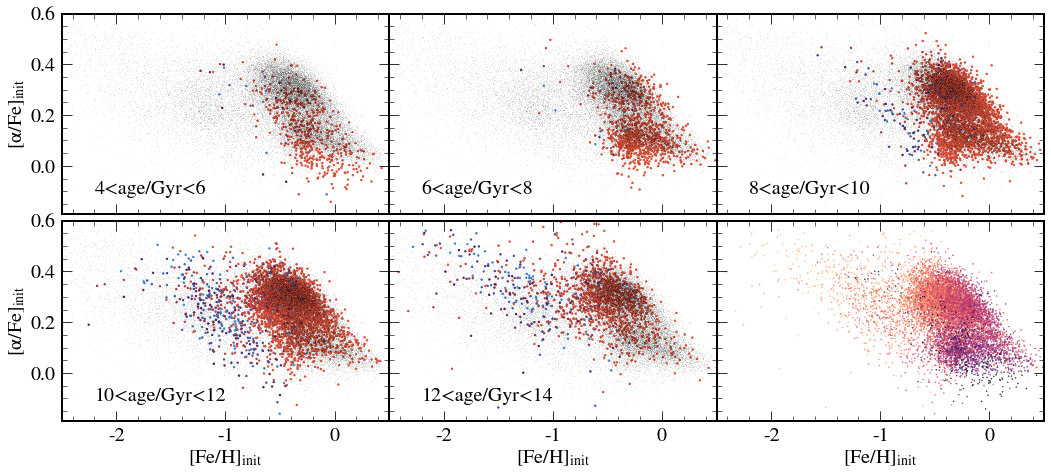

In [37]:
agrid = np.array([4,6,8,10,12,14])
age = 10**t['logAge']*1e-9

# custom colormap
clist = ['#e8573d', '#4d1763', '#3d97e8']
cmap = mpl.colors.LinearSegmentedColormap.from_list('bluepurplered', clist)

fig, ax = plt.subplots(2,3,figsize=(15,7), sharex=True, sharey=True)

for i in range(5):
    irow = int(i/3)
    icol = i%3
    plt.sca(ax[irow][icol])
    
    ind = (age>=agrid[i]) & (age<agrid[i+1])
    plt.plot(t['init_FeH'], t['init_aFe'], 'ko', mew=0, alpha=0.1, ms=1, rasterized=True)
#     plt.plot(t['init_FeH'][ind & ind_safeage], t['init_aFe'][ind & ind_safeage],
#              'ko', ms=2, mew=0, alpha=1, rasterized=True)
#     plt.scatter(t['init_FeH'][ind & ind_safeage], t['init_aFe'][ind & ind_safeage],
#                 c=np.abs(t['Z_gal'][ind & ind_safeage]), vmin=1, vmax=5, cmap='magma', rasterized=True, s=5)
#     plt.scatter(t['init_FeH'][ind & ind_safeage], t['init_aFe'][ind & ind_safeage],
#                 c=t['eccen_pot1'][ind & ind_safeage], vmin=0, vmax=1, cmap='magma', rasterized=True, s=5)
    plt.scatter(t['init_FeH'][ind & ind_safeage], t['init_aFe'][ind & ind_safeage],
                c=t['Lz'][ind & ind_safeage]/t['Ltot'][ind & ind_safeage],
                vmin=-1, vmax=1, cmap=cmap, rasterized=True, s=2)
    
    plt.text(0.1,0.1, '{:.0f}<age/Gyr<{:.0f}'.format(agrid[i], agrid[i+1]), transform=plt.gca().transAxes)
    plt.minorticks_on()

plt.xlim(-2.5,0.5)
plt.ylim(-0.19,0.6)

plt.sca(ax[1][2])
plt.scatter(t['init_FeH'][ind_safeage], t['init_aFe'][ind_safeage], c=age[ind_safeage], vmin=4, vmax=14,
           cmap='magma', s=0.2, rasterized=True)

for i in range(2):
    plt.sca(ax[i][0])
    plt.ylabel('[$\\alpha$/Fe]$_{init}$')
    
for i in range(3):
    plt.sca(ax[1][i])
    plt.xlabel('[Fe/H]$_{init}$')
    

plt.tight_layout(h_pad=0, w_pad=0)
plt.savefig('../plots/afeh_agebins_lznorm_lp.png')

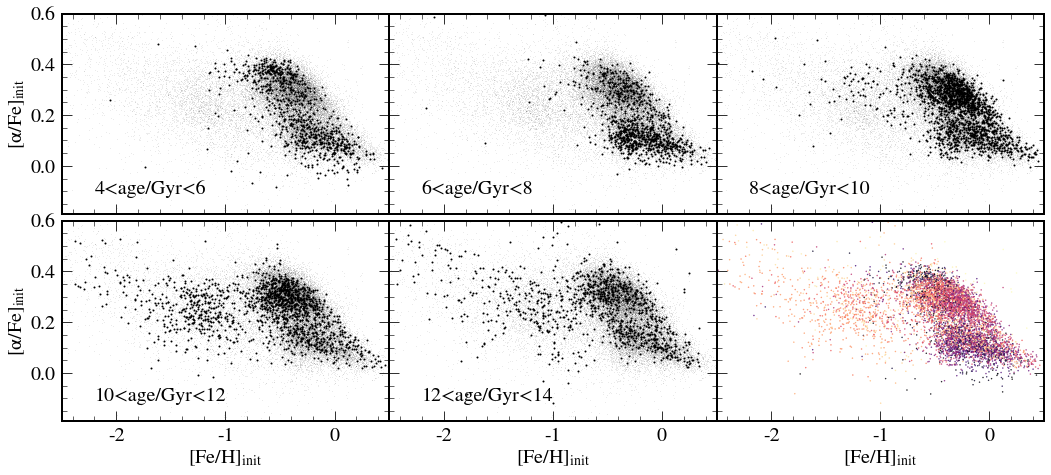

In [19]:
agrid = np.array([4,6,8,10,12,14])
age = 10**t['logAge']*1e-9
ind_snr = t['SNR']>20

fig, ax = plt.subplots(2,3,figsize=(15,7), sharex=True, sharey=True)

for i in range(5):
    irow = int(i/3)
    icol = i%3
    plt.sca(ax[irow][icol])
    
    ind = (age>=agrid[i]) & (age<agrid[i+1]) & ind_snr
    plt.plot(t['init_FeH'], t['init_aFe'], 'ko', mew=0, alpha=0.1, ms=1, rasterized=True)
    plt.plot(t['init_FeH'][ind], t['init_aFe'][ind],
             'ko', ms=2, mew=0, alpha=1, rasterized=True)
    
    plt.text(0.1,0.1, '{:.0f}<age/Gyr<{:.0f}'.format(agrid[i], agrid[i+1]), transform=plt.gca().transAxes)
    plt.minorticks_on()

plt.xlim(-2.5,0.5)
plt.ylim(-0.19,0.6)

plt.sca(ax[1][2])
plt.scatter(t['init_FeH'][ind_snr], t['init_aFe'][ind_snr], c=age[ind_snr], vmin=4, vmax=14,
           cmap='magma', s=0.2, rasterized=True)

for i in range(2):
    plt.sca(ax[i][0])
    plt.ylabel('[$\\alpha$/Fe]$_{init}$')
    
for i in range(3):
    plt.sca(ax[1][i])
    plt.xlabel('[Fe/H]$_{init}$')
    

plt.tight_layout(h_pad=0, w_pad=0)
plt.savefig('../plots/afeh_agebins_all.png')

In [ ]:
ebins = np.linspace(0,1,30)
plt.figure(figsize=(10,7))
plt.hist(tall['eccen_pot1'][indall_thick], bins=ebins, color='k', alpha=0.3, density=True, label='Thick disk')
plt.hist(tall['eccen_pot1'][indall_thin], bins=ebins, color='r', alpha=0.3, density=True, label='Thin disk')
plt.hist(tall['eccen_pot1'][indall_trap], bins=ebins, color='b', alpha=0.3, density=True, label='Pop')
# plt.hist(t['eccen_pot1'][ind_rect], bins=ebins, color='b', alpha=0.3, density=True)

plt.legend()
plt.xlabel('Eccentricity')
plt.ylabel('Density')
plt.tight_layout()

In [ ]:
zbins = np.linspace(0,5,30)
plt.figure(figsize=(10,7))
plt.hist(np.abs(tall['Z_gal'])[indall_thick], bins=zbins, color='k', alpha=0.3, density=True, label='Thick disk')
plt.hist(np.abs(tall['Z_gal'])[indall_thin], bins=zbins, color='r', alpha=0.3, density=True, label='Thin disk')
plt.hist(np.abs(tall['Z_gal'])[indall_trap], bins=zbins, color='b', alpha=0.3, density=True, label='Pop')
# plt.hist(t['eccen_pot1'][ind_rect], bins=ebins, color='b', alpha=0.3, density=True)

plt.legend()
plt.xlabel('Z [kpc]')
plt.ylabel('Density')
plt.tight_layout()

In [ ]:
plt.plot(t['eccen_pot1'][ind_thick], np.abs(t['Z_gal'][ind_thick]), 'ko', alpha=0.3, ms=2)
plt.plot(t['eccen_pot1'][ind_thin], np.abs(t['Z_gal'][ind_thin]), 'ro', alpha=0.3, ms=2)
plt.plot(t['eccen_pot1'][ind_trap], np.abs(t['Z_gal'][ind_trap]), 'bo', alpha=0.3, ms=2)

plt.ylim(0,5)
plt.tight_layout()

In [ ]:
plt.plot(t['X_gal'][ind_thin], t['Y_gal'][ind_thin], 'ro', mew=0, alpha=0.1, ms=2)
plt.plot(t['X_gal'][ind_trap], t['Y_gal'][ind_trap], 'bo', mew=0, alpha=0.5, ms=2)

plt.xlim(-12,-5)
plt.ylim(-2,3)
plt.gca().set_aspect('equal')
plt.tight_layout()